# 사출

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
import seaborn as sns 

# 지도 학습용
super_c = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/04. Dataset_Molding/dataset/supervised_label_cn7.csv',index_col=False)
# 준지도 학습용 
lb_c = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/04. Dataset_Molding/dataset/moldset_labeled_cn7.csv',index_col=False)
lb_r = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/04. Dataset_Molding/dataset/moldset_labeled_rg3.csv',index_col=False)
ulb_c = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/04. Dataset_Molding/dataset/moldset_unlabeled_cn7.csv',index_col=False)
ulb_r = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/04. Dataset_Molding/dataset/moldset_unlabeled_rg3.csv',index_col=False)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
lb_c = lb_c.drop('Unnamed: 0', axis=1)
lb_c_0 = lb_c[lb_c.PassOrFail == 0].iloc[:,1:]
lb_c_1 = lb_c[lb_c.PassOrFail == 1].iloc[:,1:]

In [ ]:
def t_square(data,alpha:float = None):
    
    array_data = np.array(data)
    num_sample = len(data)
    
    p = array_data.shape[1]
    
    col_mean = np.mean(array_data, axis=0)
    mat_cov = np.cov(array_data.T)
    # singular matrix issue -> psuedo inverse matrix 
    mat_inv_s = np.linalg.pinv(mat_cov)
    
    values = []
    for sample in array_data:
        dif = sample - col_mean
        value = mat_inv_s.dot(dif.T).dot(dif)
        values.append(value)

    CL = (np.power((num_sample-1),2)) / num_sample
    LCL = 0
    UCL = CL*beta.ppf((1-alpha), p/2, (num_sample-p-1)/2)
        
    return values, LCL, UCL

In [ ]:
from scipy.stats import beta
t0, LCL, UCL = t_square(lb_c_0, 0.2)
t1, LCL1, UCL1 = t_square(lb_c_1, 0.2)

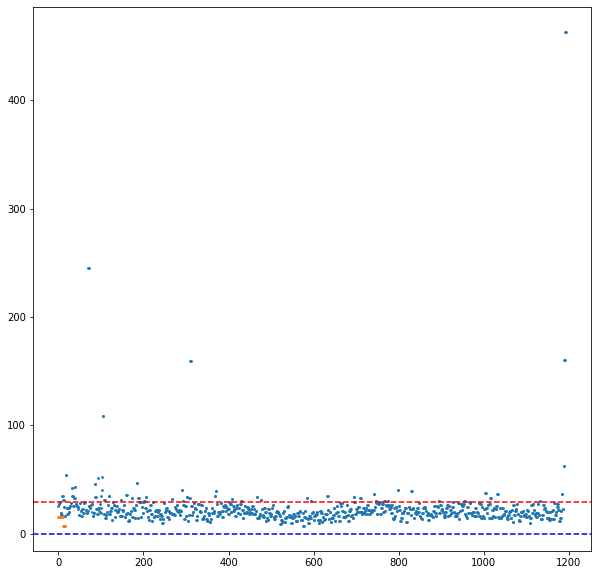

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter([i for i in range(len(t0))],t0, s=3)
plt.scatter([i for i in range(len(t1))],t1, s=3)
plt.axhline(UCL, color='r', label='UCL', linestyle='--')
plt.axhline(LCL, color='b', label='LCL', linestyle='--')

(-5.0, 30.0)

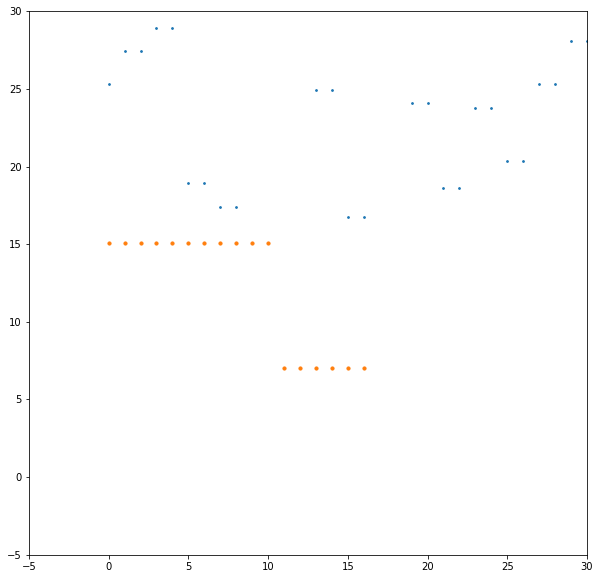

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter([i for i in range(len(t0))],t0, s=3)
plt.scatter([i for i in range(len(t1))],t1, s=10)
plt.xlim((-5,30))
plt.ylim((-5,30))

In [ ]:
t_diff = pd.DataFrame(index = list(i for i in range(17)))
for i in lb_c_1.columns:
    df = lb_c_1.drop(i, axis=1)
    t_new, LCL, UCL = t_square(df, 0.2)
    differ = np.array(t1) - np.array(t_new)
    t_diff.loc[:,i] = differ*(10**14)
t_diff

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,6.0396,3.0198,6.5725,17.5859,0.7105,9.2371,12.0792,-4.0856,8.3489,-0.5329,8.3489,-9.4147,9.7700,1.4211,8.8818,-8.8818,6.0396,7.2831,28.7770,6.7502,10.1252,6.5725,13.6779,7.1054
1,6.3949,0.0000,3.5527,-2.6645,1.9540,4.7962,-0.7105,0.5329,15.2767,6.3949,-10.6581,-39.9680,2.8422,0.7105,3.7303,-2.1316,1.9540,-0.8882,11.9016,-2.3093,0.3553,4.0856,8.8818,3.5527
2,-6.0396,-8.5265,-4.0856,4.7962,-11.9016,-4.2633,-7.1054,-6.2172,-6.3949,-7.8160,-8.7041,-10.3029,-10.3029,-7.4607,-10.1252,-8.3489,-7.9936,-12.4345,-7.4607,-11.7240,0.1776,-4.4409,-2.4869,-2.4869
3,13.1450,-33.5731,27.7112,-54.7118,52.7578,3.7303,-27.7112,-35.1719,17.9412,78.5150,-66.7910,-124.1673,53.8236,-25.0466,46.8958,-123.9897,12.4345,19.3623,-12.6121,13.6779,34.2837,-108.0025,28.0664,62.3501
4,8.5265,-0.7105,3.1974,-0.1776,12.0792,4.6185,-0.3553,-4.9738,0.8882,6.9278,-7.8160,-13.1450,5.3291,0.1776,3.1974,-2.8422,0.1776,2.1316,4.6185,2.6645,5.8620,-1.0658,4.2633,7.1054
5,2.6645,9.9476,0.8882,7.2831,1.9540,4.4409,6.0396,-2.4869,5.5067,-1.7764,6.2172,-7.8160,8.3489,-1.0658,6.0396,-44.2313,4.7962,9.5923,19.1847,2.3093,10.6581,6.0396,6.5725,6.5725
6,5.3291,5.1514,3.0198,2.3093,5.8620,7.2831,4.7962,-0.5329,4.2633,4.0856,0.0000,-1.0658,5.6843,4.4409,5.3291,1.7764,4.2633,5.3291,4.9738,1.9540,5.6843,7.9936,4.2633,4.9738
7,-0.7105,-9.7700,3.1974,-16.6978,0.8882,-6.2172,-4.6185,-6.9278,4.4409,10.1252,-10.6581,-27.5335,6.0396,-6.7502,1.0658,-47.9616,-1.9540,0.3553,-5.3291,-3.3751,-0.7105,-30.3757,4.2633,10.3029
8,-1.0658,-7.8160,3.7303,-12.6121,-3.3751,0.0000,-4.7962,-7.4607,5.8620,7.9936,-10.6581,-28.2441,6.2172,-3.1974,4.2633,-31.9744,-0.1776,-1.4211,0.7105,-1.9540,8.3489,-41.3891,4.0856,9.5923
9,2.8422,-12.9674,4.6185,-17.0530,33.5731,-4.4409,-15.2767,-20.2505,9.4147,16.5201,-22.5597,-26.6454,14.2109,-15.4543,10.6581,-47.4287,1.5987,-3.0198,-3.9080,-6.0396,22.7374,-47.6064,4.2633,15.9872


In [ ]:
abssum = pd.DataFrame(columns = t_diff.columns, index=['sum'])
for i in t_diff.columns:
  num = 0
  for j in range(len(t_diff)):
    num += abs(t_diff.loc[j,i])
  abssum.loc['sum',i] = num

In [ ]:
abssum

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
sum,113.5092,170.5303,89.5284,221.3341,231.6369,76.5610,189.3596,165.7341,114.9303,229.3277,304.8228,444.7998,200.0178,116.7066,164.3130,656.7191,71.5872,96.2785,123.8121,121.6804,234.6567,374.4560,128.4306,213.6957


# 탱크 용해

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [ ]:
tank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/08. Dataset_Meltingtank/dataset/melting_tank.csv')
tank = tank.drop('NUM', axis=1)
tank = tank.replace({'OK':0, 'NG':1})
tank = tank.iloc[:int(len(tank)/10),:]
tank.head()

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,489,116,631,3.19,0
1,2020-03-04 0:00,433,78,609,3.19,0
2,2020-03-04 0:00,464,154,608,3.19,0
3,2020-03-04 0:00,379,212,606,3.19,0
4,2020-03-04 0:00,798,1736,604,3.21,0


In [ ]:
tank2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/08. Dataset_Meltingtank/dataset/melting_tank.csv')
tank2 = tank2.drop('NUM', axis=1)
tank2 = tank2.replace({'OK':0, 'NG':1})
tank2 = tank2.iloc[2*int(len(tank2)/10):3*int(len(tank2)/10),:]
sum(tank2.TAG == 1), sum(tank2.TAG == 0)

(17944, 65576)

In [ ]:
tank3

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
250510,2020-03-21 9:31,476,123,259,3.20,0
250511,2020-03-21 9:31,421,81,258,3.19,1
250512,2020-03-21 9:31,502,147,256,3.19,0
250513,2020-03-21 9:31,389,200,254,3.19,1
250514,2020-03-21 9:31,772,1740,253,3.21,0
250515,2020-03-21 9:31,755,1774,252,3.22,0
250516,2020-03-21 9:31,395,222,250,3.19,1
250517,2020-03-21 9:31,474,175,248,3.20,0
250518,2020-03-21 9:31,440,62,247,3.19,1
250519,2020-03-21 9:31,509,153,246,3.19,0


In [ ]:
tank3 = tank2[-50:]

plot_acf(tank3.MELT_TEMP)
plot_pacf(tank3.MELT_TEMP)
plt.show()

NameError: ignored

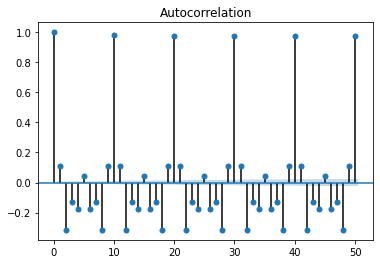

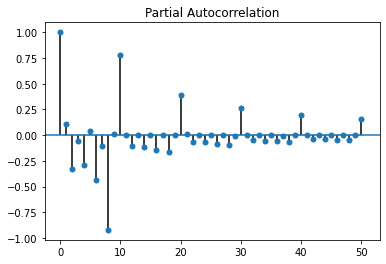

In [ ]:
plot_acf(tank2.MELT_TEMP)
plot_pacf(tank2.MELT_TEMP)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(tank_0['MELT_TEMP'])
print(result)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-36.96223098395264, 0.0, 65, 83454, {'1%': -3.4304283605477526, '5%': -2.8615746340587664, '10%': -2.5667884345107397}, 737097.5631159855)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(tank_0.MELT_TEMP)
plot_pacf(tank_0.MELT_TEMP)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

In [ ]:
print(len(tank))
print(len(tank.drop_duplicates()))

835200
835198


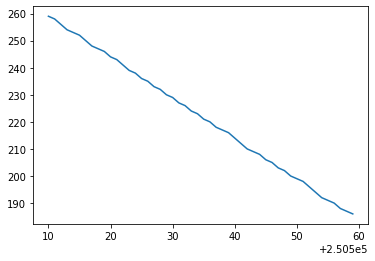

In [ ]:
plt.plot(tank3.MELT_WEIGHT)

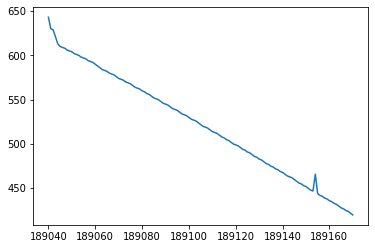

In [ ]:
plt.plot(tank4.MELT_WEIGHT)

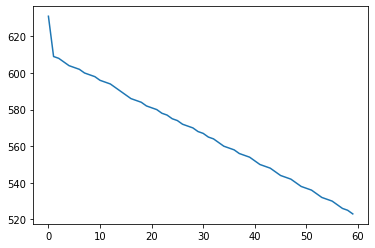

In [ ]:
plt.plot(tank.iloc[:60,:].MELT_WEIGHT)

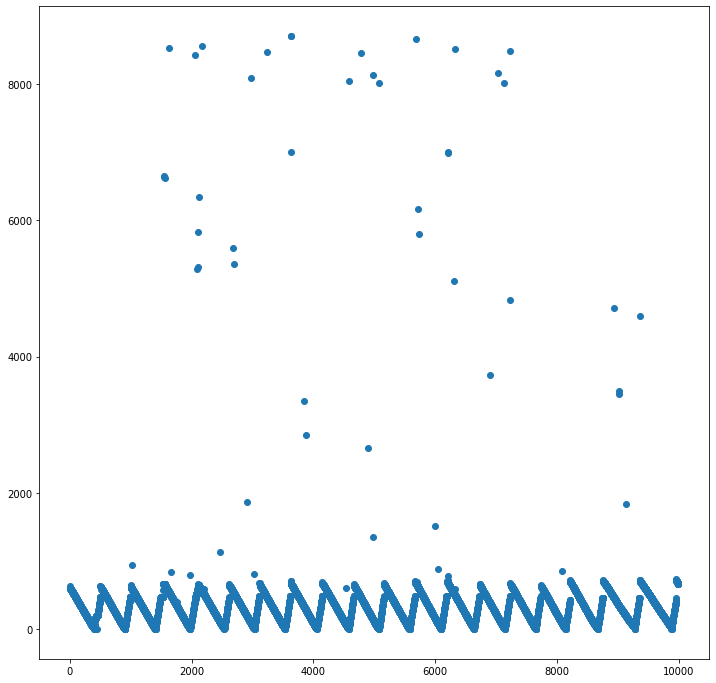

In [ ]:
tank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/08. Dataset_Meltingtank/dataset/melting_tank.csv')

plt.figure(figsize=(12,12))
plt.scatter([i for i in range(10000)],tank.iloc[:10000,:].MELT_WEIGHT)

In [ ]:
tank = tank.drop('NUM', axis=1)
tank = tank.replace({'OK':0, 'NG':1})

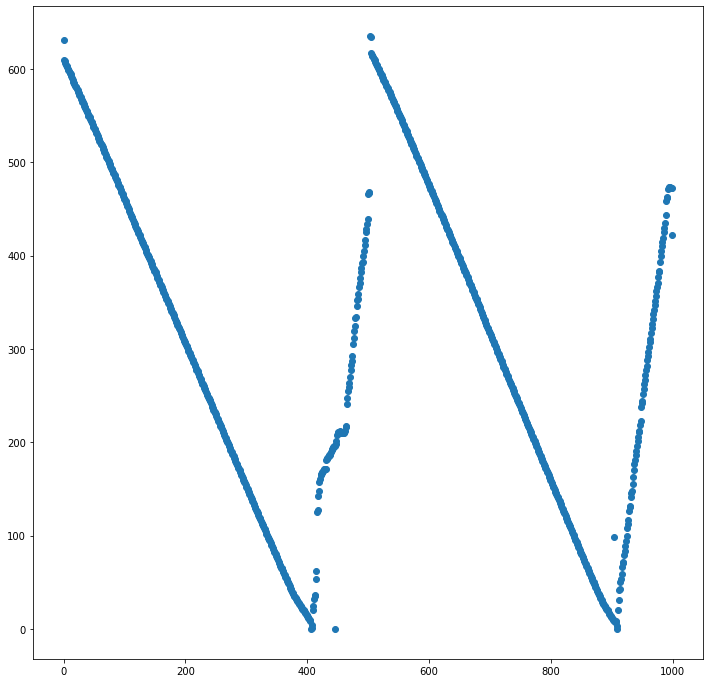

In [ ]:
tank_0 = tank[tank.TAG == 0]
plt.figure(figsize=(12,12))
plt.scatter([i for i in range(1000)],tank_0.iloc[:1000,:].MELT_WEIGHT)

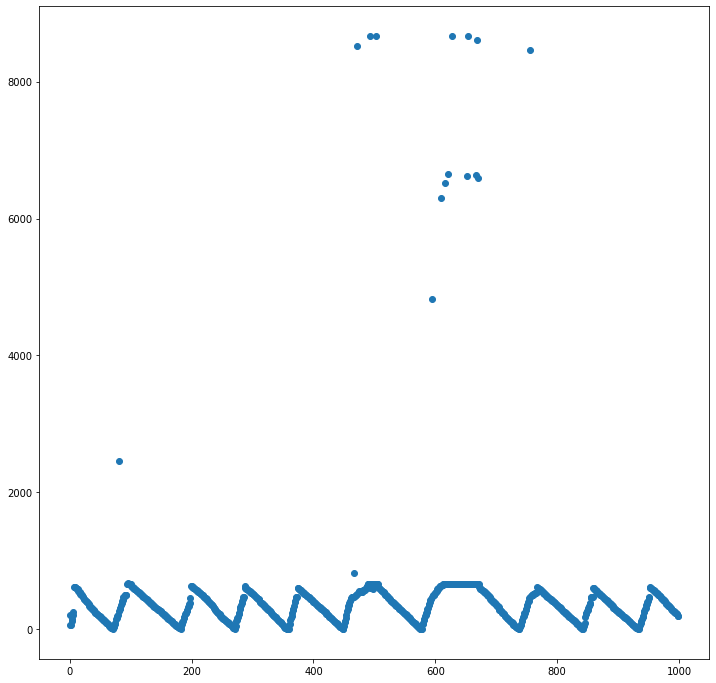

In [ ]:
tank_1 = tank[tank.TAG == 1]
plt.figure(figsize=(12,12))
plt.scatter([i for i in range(1000)],tank_1.iloc[:1000,:].MELT_WEIGHT)

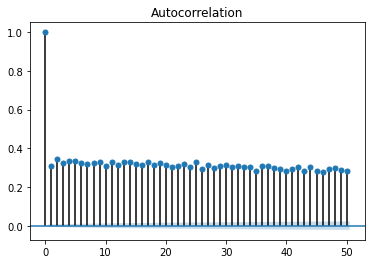

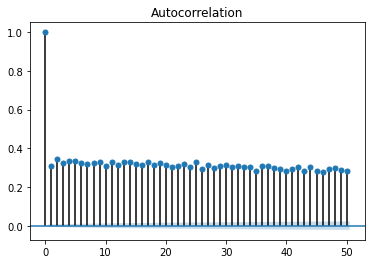

In [ ]:
plot_acf(tank2.MELT_WEIGHT)

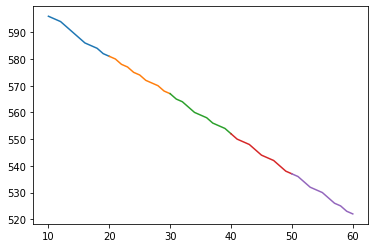

In [ ]:
for i in range(1,6):
  plt.plot(tank.loc[10*i:10*(i+1), 'MELT_WEIGHT'])

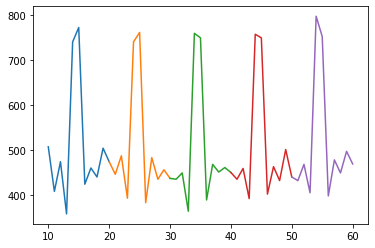

In [ ]:
for i in range(1,6):
  plt.plot(tank.loc[10*i:10*(i+1), 'MELT_TEMP'])

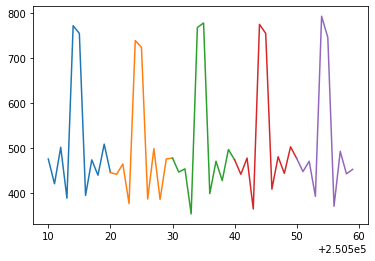

In [ ]:
for i in range(5):
  plt.plot(tank3.iloc[10*i:10*(i+1)+1,:].MELT_TEMP)

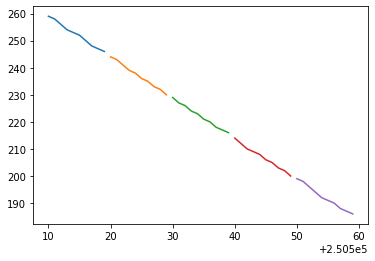

In [ ]:
for i in range(5):
  plt.plot(tank3.iloc[10*i:10*(i+1),:].MELT_WEIGHT)

In [ ]:
len(tank3)

50

<Figure size 2880x3600 with 0 Axes>

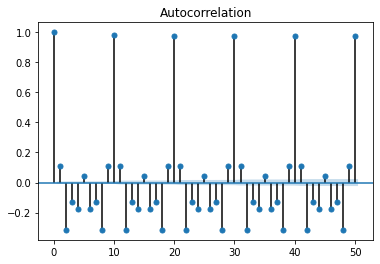

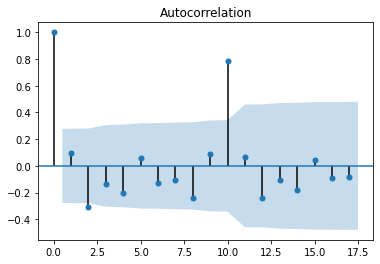

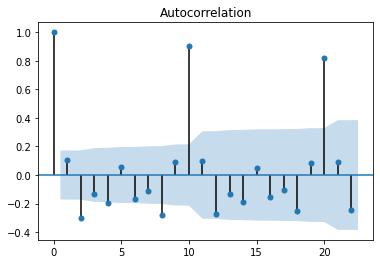

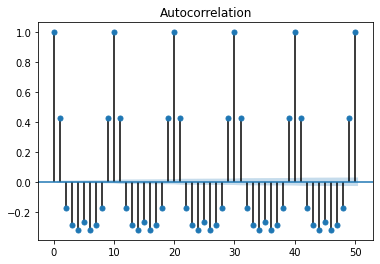

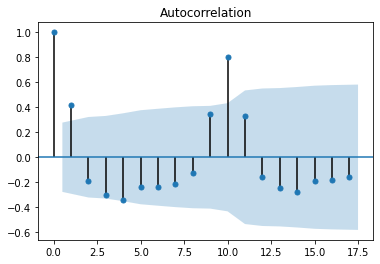

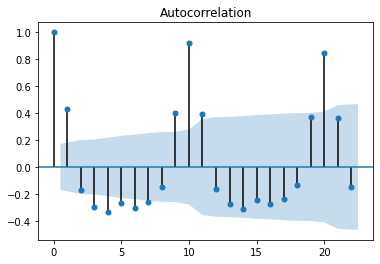

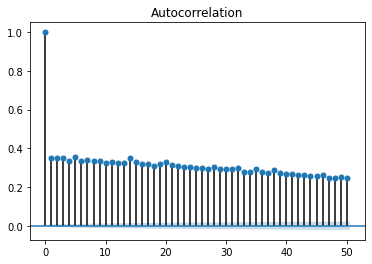

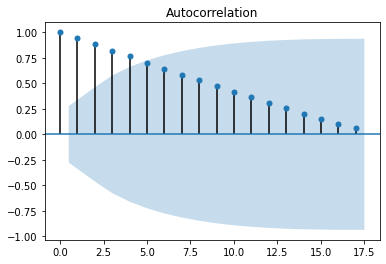

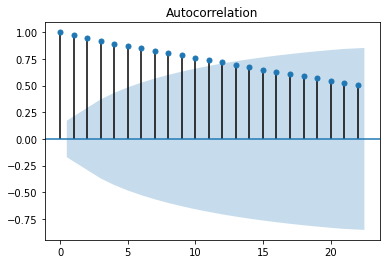

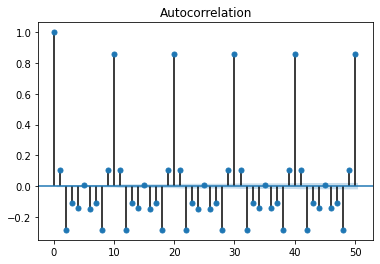

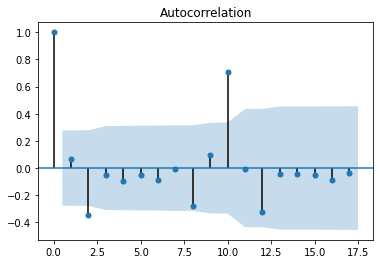

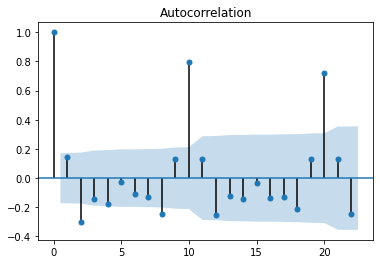

In [ ]:
plt.figure(figsize=(40,50))
col = tank.columns[1:-1]

for i in range(4):
  plot_acf(tank.loc[:,col[i]])
  plot_acf(tank3.loc[:,col[i]])
  plot_acf(tank4.loc[:,col[i]])

plt.show()

In [ ]:
tank.columns

Index(['STD_DT', 'MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG'], dtype='object')

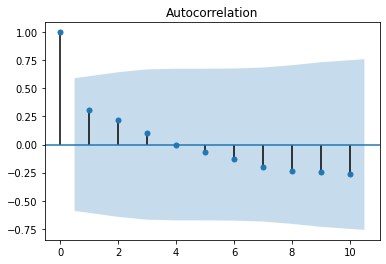

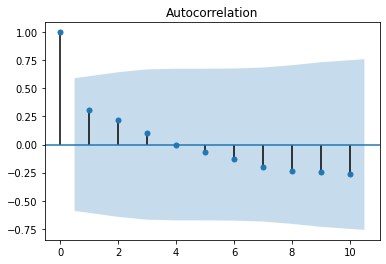

In [ ]:
plot_acf(tank.loc[:10,'MELT_WEIGHT'])

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 2880x3600 with 0 Axes>

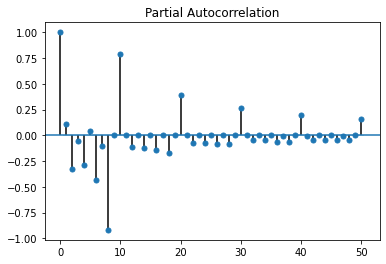

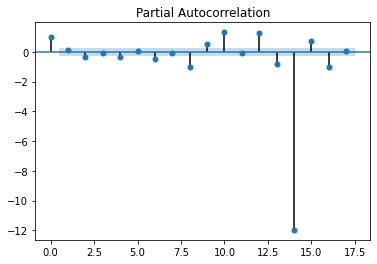

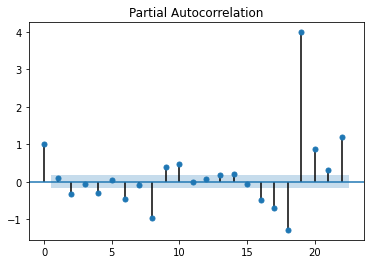

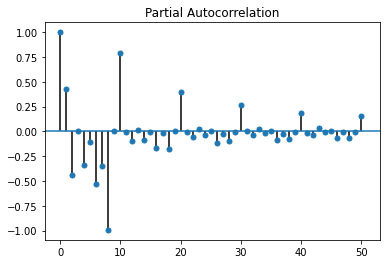

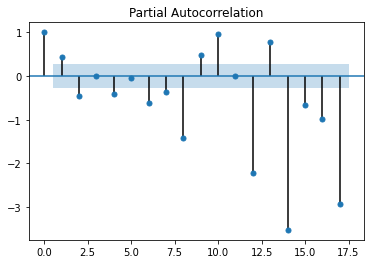

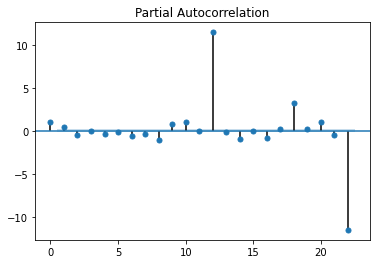

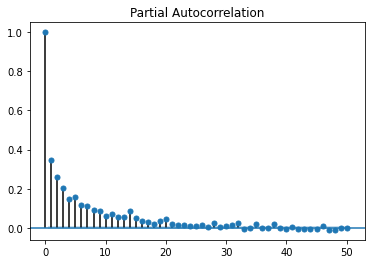

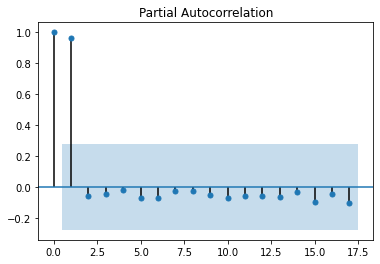

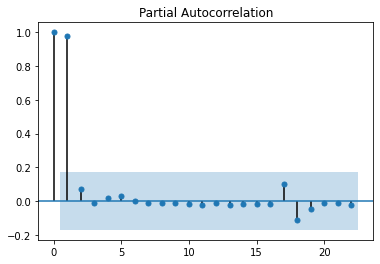

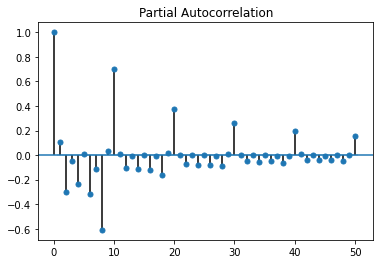

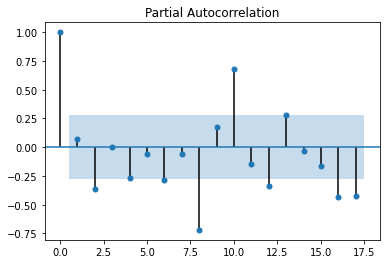

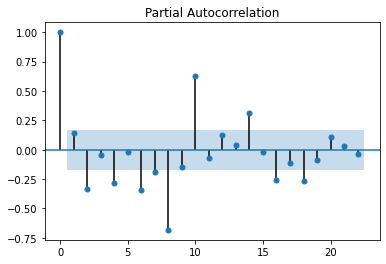

In [ ]:
plt.figure(figsize=(40,50))
col = tank.columns[1:-1]

for i in range(4):
  plot_pacf(tank.loc[:,col[i]])
  plot_pacf(tank3.loc[:,col[i]])
  plot_pacf(tank4.loc[:,col[i]])

plt.show()

In [ ]:
tttt = tank2[tank2.TAG == 1]
tttt.iloc[:200,:]
tank4 = tank2.loc[189040:189170,:]

In [ ]:
tank

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,489,116,631,3.19,0
1,2020-03-04 0:00,433,78,609,3.19,0
2,2020-03-04 0:00,464,154,608,3.19,0
3,2020-03-04 0:00,379,212,606,3.19,0
4,2020-03-04 0:00,798,1736,604,3.21,0
...,...,...,...,...,...,...
835195,2020-04-30 23:59,755,1743,318,3.21,0
835196,2020-04-30 23:59,385,206,317,3.19,0
835197,2020-04-30 23:59,465,148,316,3.20,0
835198,2020-04-30 23:59,467,0,314,3.19,0


In [ ]:
tank.iloc[:1000,:].MELT_WEIGHT

ValueError: ignored

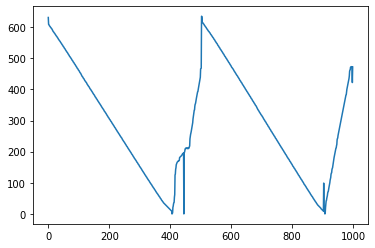

In [ ]:
plt.plot(tank.iloc[:1000,:].MELT_WEIGHT)

In [ ]:
def t_square(data):
    
    array_data = np.array(data)
    num_sample = len(data)
    
    p = array_data.shape[1]
    
    col_mean = np.mean(array_data, axis=0)
    mat_cov = np.cov(array_data.T)
    # singular matrix issue -> psuedo inverse matrix 
    mat_inv_s = np.linalg.pinv(mat_cov)
    
    values = []
    for sample in array_data:
        dif = sample - col_mean
        value = mat_inv_s.dot(dif.T).dot(dif)
        values.append(value)
        
    return values

In [ ]:
tank_t = t_square(tank)

In [ ]:
tank

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,489,116,631,3.19,0
1,2020-03-04 0:00,433,78,609,3.19,0
2,2020-03-04 0:00,464,154,608,3.19,0
3,2020-03-04 0:00,379,212,606,3.19,0
4,2020-03-04 0:00,798,1736,604,3.21,0
...,...,...,...,...,...,...
83515,2020-03-09 19:11,752,1734,602,3.22,0
83516,2020-03-09 19:11,373,196,601,3.18,0
83517,2020-03-09 19:11,455,158,599,3.19,0
83518,2020-03-09 19:11,407,61,597,3.19,0


In [ ]:
tank3_t = t_square(tank3.iloc[:,[1,2,4]])
tank_t = t_square(tank.iloc[:50,[1,2,4]])

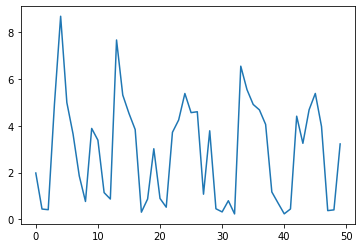

In [ ]:
plt.plot(tank_t)

In [ ]:
pd.concat([df, tank3.TAG], ignore_index=True)

,0
0,4.008676
1,0.626931
2,2.818578
3,3.501665
4,6.301995
...,...
145,0.000000
146,1.000000
147,0.000000
148,1.000000


In [ ]:
df

,0,TAG
0,4.008676,0
1,0.626931,1
2,2.818578,0
3,3.501665,1
4,6.301995,0
5,5.190492,0
6,3.158804,1
7,3.615159,0
8,0.465657,1
9,3.420407,0


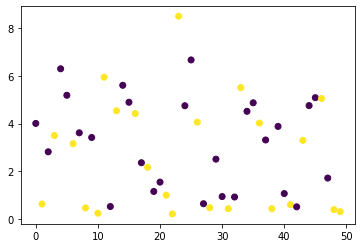

In [ ]:
df = pd.DataFrame(tank3_t)
tank3 = tank3.reset_index(drop=True)
df = pd.concat([df, tank3.TAG], axis=1)
plt.scatter(df.index,df.iloc[:,0], c=df.iloc[:,1])

In [ ]:
df

,0,tag
0,4.008676,NaN
1,0.626931,NaN
2,2.818578,NaN
3,3.501665,NaN
4,6.301995,NaN
5,5.190492,NaN
6,3.158804,NaN
7,3.615159,NaN
8,0.465657,NaN
9,3.420407,NaN


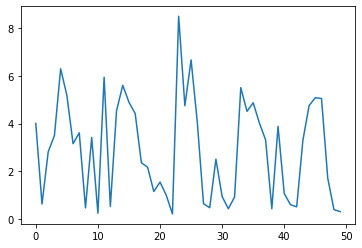

In [ ]:
plt.plot(tank3_t)

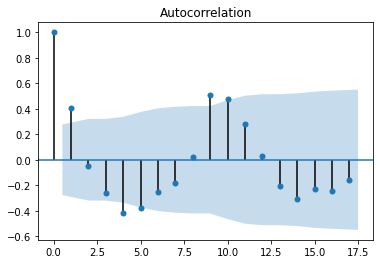

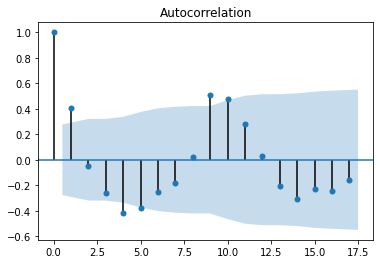

In [ ]:
import numpy as np
plot_acf(np.array(tank_t))

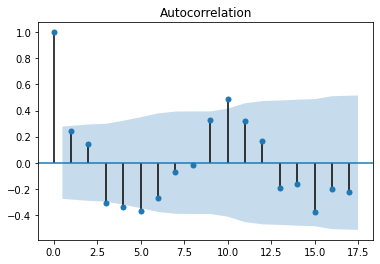

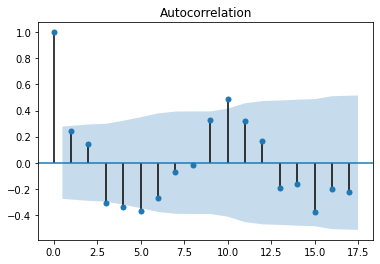

In [ ]:
plot_acf(np.array(tank3_t))

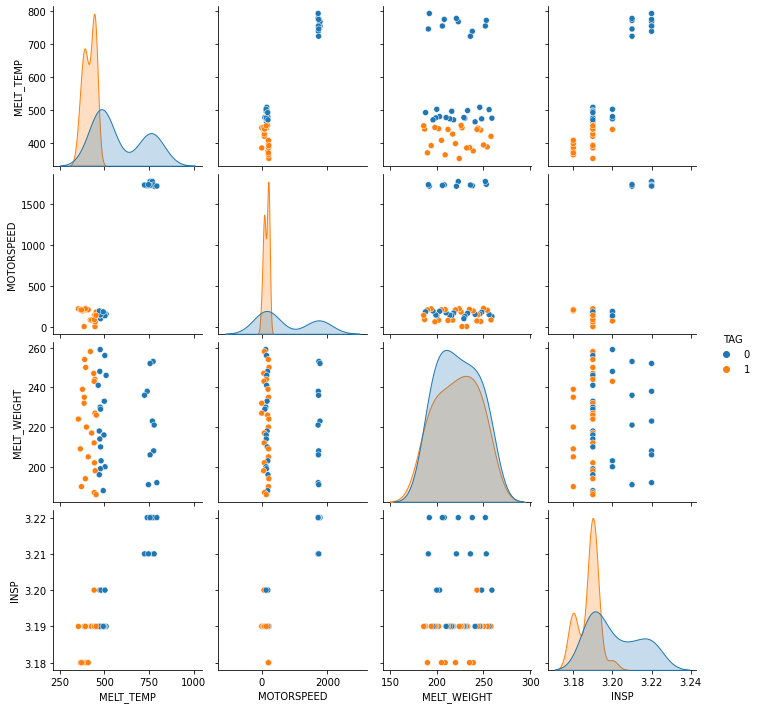

In [ ]:
import seaborn as sns
sns.pairplot(tank3, hue='TAG')

In [ ]:
tank4 = tank3[tank3.MOTORSPEED < 100]
print(len(tank4))
tank4 = tank4[tank4.MELT_TEMP < 500]
print(len(tank4))
tank4

11
11


,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
250511,2020-03-21 9:31,421,81,258,3.19,1
250518,2020-03-21 9:31,440,62,247,3.19,1
250521,2020-03-21 9:32,442,68,243,3.20,1
250528,2020-03-21 9:32,386,0,232,3.19,1
250530,2020-03-21 9:33,478,96,229,3.19,0
250531,2020-03-21 9:33,447,0,227,3.19,1
250538,2020-03-21 9:33,428,79,217,3.19,1
250541,2020-03-21 9:34,442,74,212,3.19,1
250548,2020-03-21 9:34,444,78,202,3.19,1
250551,2020-03-21 9:35,448,58,198,3.19,1


In [ ]:
tank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/08. Dataset_Meltingtank/dataset/melting_tank.csv')
tank = tank[tank.MOTORSPEED < 100]
print(len(tank))
tank = tank[tank.MELT_TEMP < 500]
print(len(tank))
tank = tank[tank.INSP < 3.21]

168145
167273


In [ ]:
print(len(tank))
print(sum(tank.TAG == 'NG'))

167273
67271


In [ ]:
tank3.head()

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-21 9:31,476,123,259,3.20,0
1,2020-03-21 9:31,421,81,258,3.19,1
2,2020-03-21 9:31,502,147,256,3.19,0
3,2020-03-21 9:31,389,200,254,3.19,1
4,2020-03-21 9:31,772,1740,253,3.21,0


In [ ]:
def t_square(data):
    global mat_inv_s
    global col_mean 
    
    array_data = np.array(data)
    num_sample = len(data)
    
    p = array_data.shape[1]
    
    col_mean = np.mean(array_data, axis=0)
    mat_cov = np.cov(array_data.T)
    # singular matrix issue -> psuedo inverse matrix 
    mat_inv_s = np.linalg.pinv(mat_cov)
    
    values = []
    for sample in array_data:
        dif = sample - col_mean
        value = mat_inv_s.dot(dif.T).dot(dif)
        values.append(value)
        
    return values

In [ ]:
tank1 = tank.iloc[:80000,2:6]
t0 = t_square(tank1)
print(mat_inv_s)
print(col_mean)

array_data = np.array(tank3.iloc[:,1:5])
values = []
for sample in array_data:
  dif = sample - col_mean
  value = mat_inv_s.dot(dif.T).dot(dif)
  values.append(value)

[[ 2.69517598e-03 -8.04481521e-05  1.88962948e-08 -4.00322667e-01]
 [-8.04481521e-05  1.12561624e-03 -3.03012438e-08 -1.22185354e-01]
 [ 1.88962948e-08 -3.03012438e-08  9.32974004e-07 -3.52913387e-04]
 [-4.00322667e-01 -1.22185354e-01 -3.52913387e-04  7.61297539e+04]]
[442.12535     59.2452125  526.376825     3.18944512]


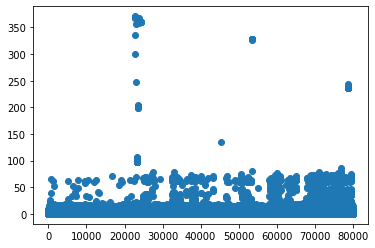

In [ ]:
plt.scatter([i for i in range(len(t0))],t0)

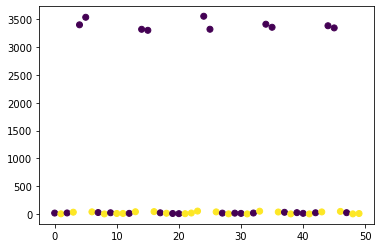

In [ ]:
plt.scatter([i for i in range(len(values))],values,c=tank3.TAG)

In [ ]:
tank1 = tank.iloc[:80000,[2,3]]
t0 = t_square(tank1)
print(mat_inv_s)
print(col_mean)

array_data = np.array(tank3.iloc[:,[1,2]])
values = []
for sample in array_data:
  dif = sample - col_mean
  value = mat_inv_s.dot(dif.T).dot(dif)
  values.append(value)

[[ 2.69307060e-03 -8.10900909e-05]
 [-8.10900909e-05  1.12541911e-03]]
[442.12535    59.2452125]


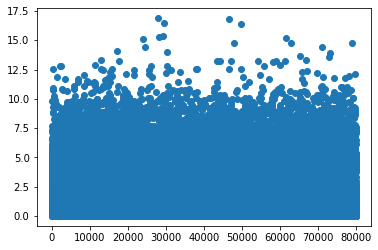

In [ ]:
plt.scatter([i for i in range(len(t0))],t0)

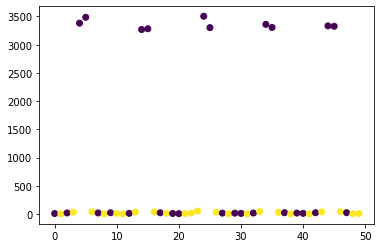

In [ ]:
plt.scatter([i for i in range(len(values))],values,c=tank3.TAG)

In [ ]:
tank3.iloc[[i for i in range(len(values)) if values[i] < 100]]

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-21 9:31,476,123,259,3.20,0
1,2020-03-21 9:31,421,81,258,3.19,1
2,2020-03-21 9:31,502,147,256,3.19,0
3,2020-03-21 9:31,389,200,254,3.19,1
6,2020-03-21 9:31,395,222,250,3.19,1
7,2020-03-21 9:31,474,175,248,3.20,0
8,2020-03-21 9:31,440,62,247,3.19,1
9,2020-03-21 9:31,509,153,246,3.19,0
10,2020-03-21 9:32,446,143,244,3.19,1
11,2020-03-21 9:32,442,68,243,3.20,1


In [ ]:
[values[i] for i in range(len(values)) if tank3.loc[i,'TAG']==1]

[1.8090270040920178,
 31.110089387299542,
 37.03603233603745,
 0.021655091496577593,
 7.88246255688087,
 0.08647950955514433,
 32.35026510880247,
 35.108905088203635,
 11.894261204642925,
 4.061046595040195,
 16.022488417805008,
 51.17708009833586,
 29.602961750140675,
 1.0217882268553582,
 0.24535023575603512,
 42.43695338337507,
 27.647030289586628,
 0.39961948492622035,
 0.09587334189496123,
 35.763869598074024,
 38.53925610058579,
 0.7449076099030429,
 6.985411472909956]

In [ ]:
tank_3_13 = tank3.iloc[:,[1,3]]
tank_3_24 = tank3.iloc[:,[2,4]]

In [ ]:
t1 = t_square(tank_3_13)
t2 = t_square(tank_3_24)

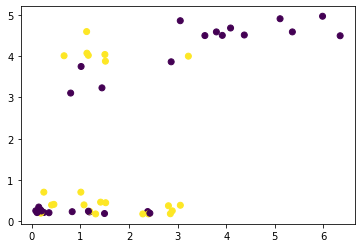

In [ ]:
plt.scatter(t1,t2, c=tank3.TAG)

# 새로 시작


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [7]:
tank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/08. Dataset_Meltingtank/dataset/melting_tank.csv')
tank = tank.drop('NUM', axis=1)
tank = tank.replace({'OK':0, 'NG':1})
tank.head()

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,489,116,631,3.19,0
1,2020-03-04 0:00,433,78,609,3.19,0
2,2020-03-04 0:00,464,154,608,3.19,0
3,2020-03-04 0:00,379,212,606,3.19,0
4,2020-03-04 0:00,798,1736,604,3.21,0


In [8]:
tank_normal = pd.concat([tank.iloc[:10000,0], tank_normal])

NameError: ignored

In [9]:
tank_normal = pd.concat([ tank_normal,tank.iloc[:10000,5],])

NameError: ignored

In [5]:
tank_normal.head()

NameError: ignored

In [10]:
tank_normal = tank.iloc[:10000,1:5]
for i in range(10):
    globals()[f'tank_{i}'] = tank_normal.iloc[[10*j+i for j in range(1000)],:]

In [11]:
for i in range(10):
  globals()[f'mean_{i}'] = globals()[f'tank_{i}'].mean()

In [12]:
for i in range(10):
  for j in range(1000):
    for k in range(4):
        globals()[f'tank_{i}'].iloc[j,k] = globals()[f'tank_{i}'].iloc[j,k] - globals()[f'mean_{i}'][k]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [13]:
for i in range(1,10):
  tank_0 = pd.concat([tank_0, globals()[f'tank_{i}']])

In [14]:
tank_normal = tank_0.sort_index()

In [15]:
tank_normal.head(10)

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
0,7.427,-13.826,294.025,-0.00216
1,-8.268,19.153,256.391,0.00079
2,-15.100,-14.359,267.634,-0.00204
3,-10.056,4.545,272.871,0.00525
4,43.644,2.868,224.706,-0.00614
5,-12.109,-12.098,263.326,-0.00592
6,-0.046,4.007,265.884,0.00536
7,14.256,-15.607,238.222,-0.00209
8,-14.718,-59.897,264.129,0.00079
9,7.523,18.774,250.639,0.00813


In [16]:
tank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/08. Dataset_Meltingtank/dataset/melting_tank.csv')
tank = tank.drop('NUM', axis=1)
tank = tank.replace({'OK':0, 'NG':1})

In [17]:
tank_ab = tank.iloc[3*int(len(tank)/10)-100:3*int(len(tank)/10),:]
tank_ab = tank_ab.iloc[:,1:5]
tank_ab.head()

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
250460,486,120,336,3.19
250461,470,62,334,3.19
250462,487,165,333,3.19
250463,409,215,332,3.19
250464,747,1723,330,3.21


In [18]:
def deseasonalize(df):
  global mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9
  
  num = int(len(df)/10)

  for i in range(num):
    for k in range(4):
      a = float(df.iloc[10*i,k])- mean_0[k]
      df.iloc[10*i,k] =a
      df.iloc[10*i+1,k] = df.iloc[10*i+1,k] - mean_1[k]
      df.iloc[10*i+2,k] = df.iloc[10*i+2,k] - mean_2[k]
      df.iloc[10*i+3,k] = df.iloc[10*i+3,k] - mean_3[k]
      df.iloc[10*i+4,k] = df.iloc[10*i+4,k] - mean_4[k]
      df.iloc[10*i+5,k] = df.iloc[10*i+5,k] - mean_5[k]
      df.iloc[10*i+6,k] = df.iloc[10*i+6,k] - mean_6[k]
      df.iloc[10*i+7,k] = df.iloc[10*i+7,k] - mean_7[k]
      df.iloc[10*i+8,k] = df.iloc[10*i+8,k] - mean_8[k]
      df.iloc[10*i+9,k] = df.iloc[10*i+9,k] - mean_9[k]

    return df

In [19]:
tank_ab = deseasonalize(tank_ab)
tank_ab.head()

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
250460,4.427,-9.826,-0.975,-0.00216
250461,28.732,3.153,-18.609,0.00079
250462,7.900,-3.359,-7.366,-0.00204
250463,19.944,7.545,-1.129,0.00525
250464,-7.356,-10.132,-49.294,-0.00614


In [20]:
tank_ab_tag = tank.iloc[3*int(len(tank)/10)-100:3*int(len(tank)/10),-1]
tank_ab.loc[:,'TAG'] = tank_ab_tag
tank_ab.head()

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
250460,4.427,-9.826,-0.975,-0.00216,0
250461,28.732,3.153,-18.609,0.00079,0
250462,7.900,-3.359,-7.366,-0.00204,0
250463,19.944,7.545,-1.129,0.00525,1
250464,-7.356,-10.132,-49.294,-0.00614,0


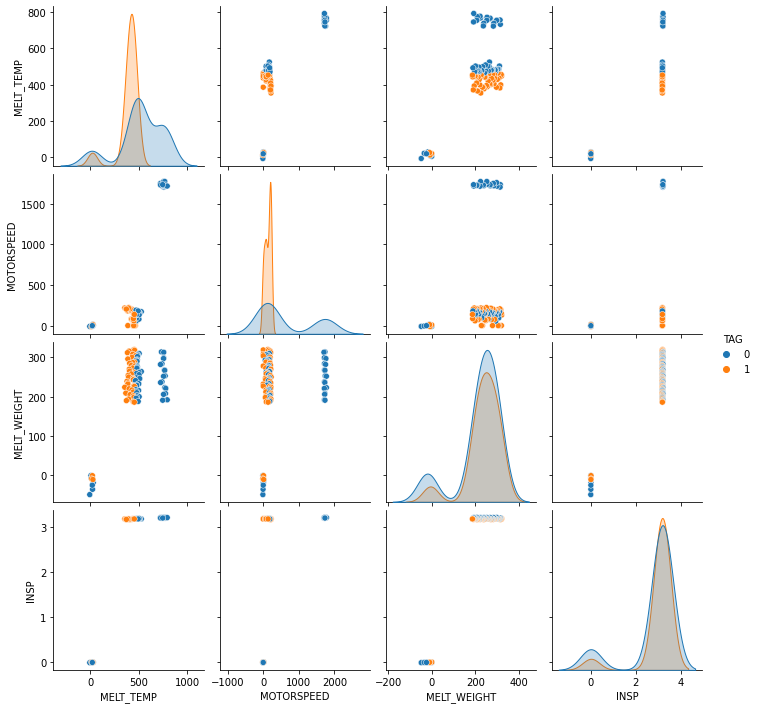

In [ ]:
import seaborn as sns
sns.pairplot(tank_ab, hue = 'TAG')

# 오토인코더 _ 패턴


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
tank_normal = tank.iloc[:10000,1:5]
tank_normal.head()

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
0,489,116,631,3.19
1,433,78,609,3.19
2,464,154,608,3.19
3,379,212,606,3.19
4,798,1736,604,3.21


In [24]:
scaler = MinMaxScaler()
tank_normal = scaler.fit_transform(tank_normal)

In [25]:
tank_test = tank.iloc[200000:250000, 1:6]
idx = tank_test[tank_test.TAG == 1].index
tank_test = tank.iloc[200000:250000, 1:5]
tank_test.head()

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
200000,484,134,131,3.19
200001,418,0,129,3.19
200002,481,194,128,3.20
200003,393,183,126,3.18
200004,774,1711,125,3.22


In [26]:
tank_test_n = tank_test.loc[idx,:]

set_idx = set(idx)
set_all = set(tank_test.index)
idx2 = set_all - set_idx 
tank_test_y = tank_test.loc[idx2,:]

In [27]:
tank_test_n = scaler.transform(tank_test_n)
tank_test_y = scaler.transform(tank_test_y)

In [40]:
# 가이드북 대로

def AE(epoch, batch):
  # 인코더
  global train_start
  train_start = time.time()
  dropout_encoder = Sequential([
                                
      Dropout(0.3),
      Dense(20,activation="relu"), 
      Dense(10,activation="relu")])
  # 디코더
  dropout_decoder = Sequential([
      Dense(20,activation="relu",input_shape=[10]),
      Dense(tank_normal.shape[1],activation="relu")])
  dropout_AE = Sequential([dropout_encoder,dropout_decoder])

  # 손실함수 옵티마이저 정의
  dropout_AE.compile(loss="mse",optimizer=Adam(lr=0.03),metrics=["accuracy"])
  # 모델훈련
  history = dropout_AE.fit(tank_normal,tank_normal,batch_size=batch,epochs=epoch,validation_split=0.2,callbacks=[EarlyStopping(monitor="val_loss",patience=10,mode="min")])
  plt.figure(1)
  plt.figure(figsize=(10,3))
  plt.plot(history.history["accuracy"],label="Training Acc")
  plt.plot(history.history["val_accuracy"],label="Validation Acc")
  plt.legend()
  plt.figure(2)
  plt.figure(figsize=(10,3))
  plt.plot(history.history["loss"],label="Training Loss")
  plt.plot(history.history["val_loss"],label="Validation Loss")
  plt.legend()
  plt.show()

  tank_train_pred = dropout_AE.predict(tank_normal)
  tank_train_loss = np.mean(np.square(tank_train_pred - tank_normal),axis=1)
  threshold = np.mean(tank_train_loss)+1.96*np.std(tank_train_loss)
  print(f"복원 오류 임계치: {threshold}") # 뭔가 이상
  print("-"*60)
  # 예측값
  global train_end
  train_end = time.time()

  # 평가 데이터 정상
  tank_predict_y = dropout_AE.predict(tank_test_y)## 정의 
  tank_test_y_mse = np.mean(np.square(tank_predict_y - tank_test_y),axis=1)
  # 시각화
  plt.figure(3)
  plt.hist(tank_test_y_mse,bins = 30)
  plt.xlabel("test mse loss")
  plt.ylabel("no of samples")
  plt.title("testing normal data")
  plt.show()

  #불량으로 판단한 데이터 확인
  tank_test_y_anomalies = len(tank_test_y_mse[tank_test_y_mse > threshold])
  fn = tank_test_y_anomalies
  # 정상을 정상으로 판단
  tp = len(tank_test_y_mse)-fn
  print(f"불량/정상 갯수 : {fn}")
  print(f"정상/정상 갯수 : {tp}")
  
 # 평가 데이터 불량

  tank_predict_n = dropout_AE.predict(tank_test_n) ##정의 
  tank_test_n_mse = np.mean(np.square(tank_predict_n - tank_test_n),axis=1)
  # 시각화
  plt.figure(4)
  plt.hist(tank_test_n_mse,bins = 30)
  plt.title("testing abnormal data")
  plt.xlabel("test mse loss")
  plt.ylabel("no of samples")
  plt.show()

  #불량으로 판단한 데이터 확인
  tank_test_n_anomalies = len(tank_test_n_mse[tank_test_n_mse > threshold])
  tn = tank_test_n_anomalies
  # 실제 불량인데 정상으로 판단한 데이터
  fp = len(tank_test_n_mse)-tn
  print(f"불량/불량 갯수 : {tn}")
  print(f"정상/불량 갯수 : {fp}")
  global test_end
  test_end = time.time()
  return (epoch,batch,fn,tp,tn,fp)
  #df_new = pd.DataFrame([(epoch,batch,fn,tp,tn,fp)])
  #relu_201020=relu_201020.append(df_new,ignore_index=True)

  '''cn7_true = np.concatenate([ np.zeros(len(cn7_test_y_anomalies)), np.ones(len(cv7_test_n_anomalies))])
  cn7_prediction = np.concatenate([cv7_test_y_anomalies,cv7_test_n_anomalies])

  from sklearn.metrics import confusion_matrix
  print(confusion_matrix(cn7_true,cn7_prediction))'''

In [33]:
def allsummery(epochs,batches,iteration):
  arr = []
  for i in epochs:
    for j in batches:
      for _ in range(iteration):
        t = AE(i,j)
        arr.append(t)
  df = pd.DataFrame(arr,columns=["epoch","batch","fn","tp","tn","fp"])
  return df
relu_201020 = allsummery([500,100,50,30],[30,20,10],10)

Output hidden; open in https://colab.research.google.com to view.

In [47]:
relu_201020["precision"] = relu_201020["tp"]/(relu_201020["tp"]+relu_201020["fp"])
relu_201020["recall"] = relu_201020["tp"]/(relu_201020["tp"]+relu_201020["fn"])
relu_201020["accuracy"] = (relu_201020["tp"]+relu_201020["tn"])/(relu_201020["tp"]+relu_201020["fp"]+relu_201020["fn"]+relu_201020["tn"])
relu_201020["F1"] = 2*relu_201020["recall"]*relu_201020["precision"]/(relu_201020["recall"]+relu_201020["precision"])

In [36]:
relu_201020.groupby(["epoch","batch"]).mean()

fn       tp    tn  ...    recall  accuracy        F1
epoch batch                         ...                              
30    10      814.8  33501.2  65.1  ...  0.976256  0.671326  0.802796
      20     3878.9  30437.1  43.2  ...  0.886965  0.609606  0.756227
      30     3240.9  31075.1  43.8  ...  0.905557  0.622378  0.766440
50    10     3041.4  31274.6  49.8  ...  0.911371  0.626488  0.768960
      20     1162.1  33153.9  57.5  ...  0.966135  0.664228  0.797777
      30     3041.2  31274.8  47.5  ...  0.911377  0.626446  0.769452
100   10     1104.1  33211.9  70.0  ...  0.967826  0.665638  0.798649
      20     2311.9  32004.1  57.1  ...  0.932629  0.641224  0.780599
      30     2140.5  32175.5  55.2  ...  0.937624  0.644614  0.783292
500   10     2488.9  31827.1  44.8  ...  0.927471  0.637438  0.777386
      20     2579.5  31736.5  52.5  ...  0.924831  0.635780  0.776757
      30     2685.2  31630.8  56.9  ...  0.921751  0.633754  0.774667

[12 rows x 8 columns]

Epoch 1/30
800/800 [==============================] - 2s 2ms/step - loss: 0.0145 - accuracy: 0.7981 - val_loss: 0.0159 - val_accuracy: 0.6585
Epoch 2/30
800/800 [==============================] - 2s 2ms/step - loss: 0.0073 - accuracy: 0.8392 - val_loss: 0.0249 - val_accuracy: 0.6565
Epoch 3/30
800/800 [==============================] - 2s 2ms/step - loss: 0.0064 - accuracy: 0.8413 - val_loss: 0.0219 - val_accuracy: 0.6575
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 0.0076 - accuracy: 0.8446 - val_loss: 0.0251 - val_accuracy: 0.6590
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 0.0059 - accuracy: 0.8452 - val_loss: 0.0195 - val_accuracy: 0.6585
Epoch 6/30
800/800 [==============================] - 2s 2ms/step - loss: 0.0062 - accuracy: 0.8375 - val_loss: 0.0245 - val_accuracy: 0.6585
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 0.0065 - accuracy: 0.8486 - val_loss: 0.0144 - val_accuracy: 0.6585
Epoch 

<Figure size 432x288 with 0 Axes>

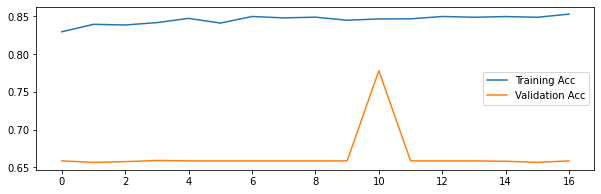

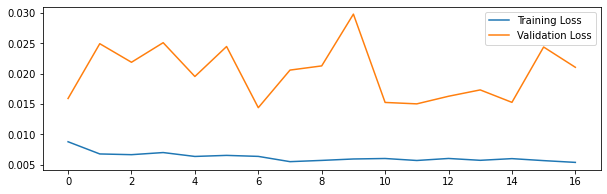

복원 오류 임계치: 0.08143352466180935
------------------------------------------------------------


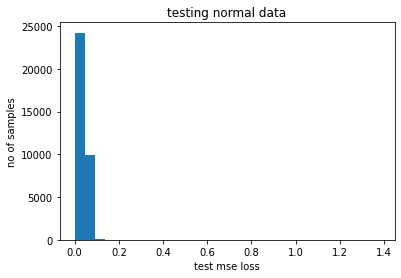

불량/정상 갯수 : 2249
정상/정상 갯수 : 32067


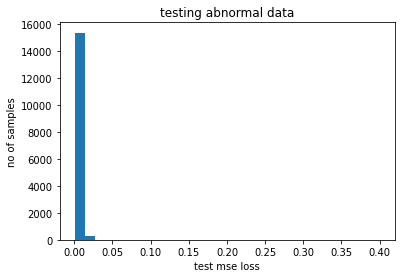

불량/불량 갯수 : 50
정상/불량 갯수 : 15634


In [41]:
def allsummery(epochs,batches,iteration):
  arr = []
  for i in epochs:
    for j in batches:
      for _ in range(iteration):
        t = AE(i,j)
        arr.append(t)
  df = pd.DataFrame(arr,columns=["epoch","batch","fn","tp","tn","fp"])
  return df

relu_201020 = allsummery([30],[10],1)

In [38]:
import time

In [43]:
train_end - train_start

27.74671244621277

In [44]:
test_end - train_end

1.332848310470581

In [49]:
relu_201020.iloc[:,6:]

,precision,recall,accuracy,F1
0,0.67225,0.934462,0.64234,0.78196


In [46]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b